In [136]:
from utils import *

# Load Data

### Load Untreated Biofilm and Release Cells

Loaded 6 release cells images from 'biofilm_data/release_cells/Untreated'


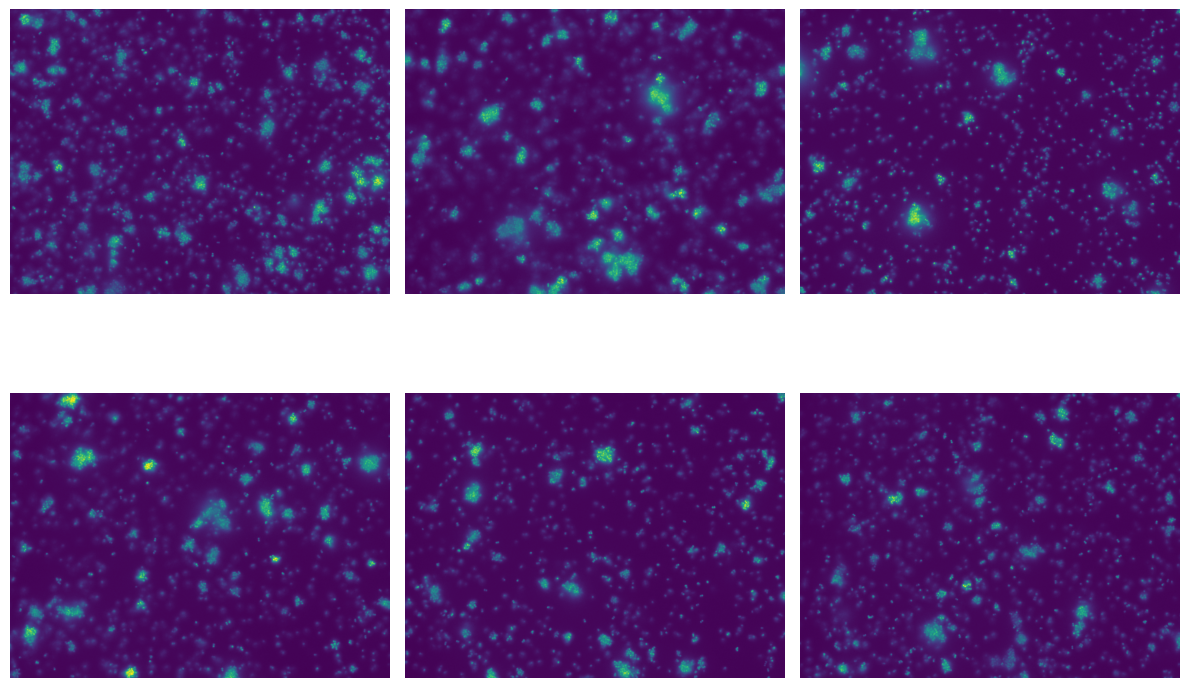

In [137]:
untreated_release_cells_images = [normalize(grayscale(image)) for image in load_images('biofilm_data/release_cells/Untreated')]

print(f"Loaded {len(untreated_release_cells_images)} release cells images from 'biofilm_data/release_cells/Untreated'")
display_grid_of_images(untreated_release_cells_images)

### Load NaIO4 Release Cell Images

Loaded 6 release cells images from 'biofilm_data/release_cells/NaIO4'


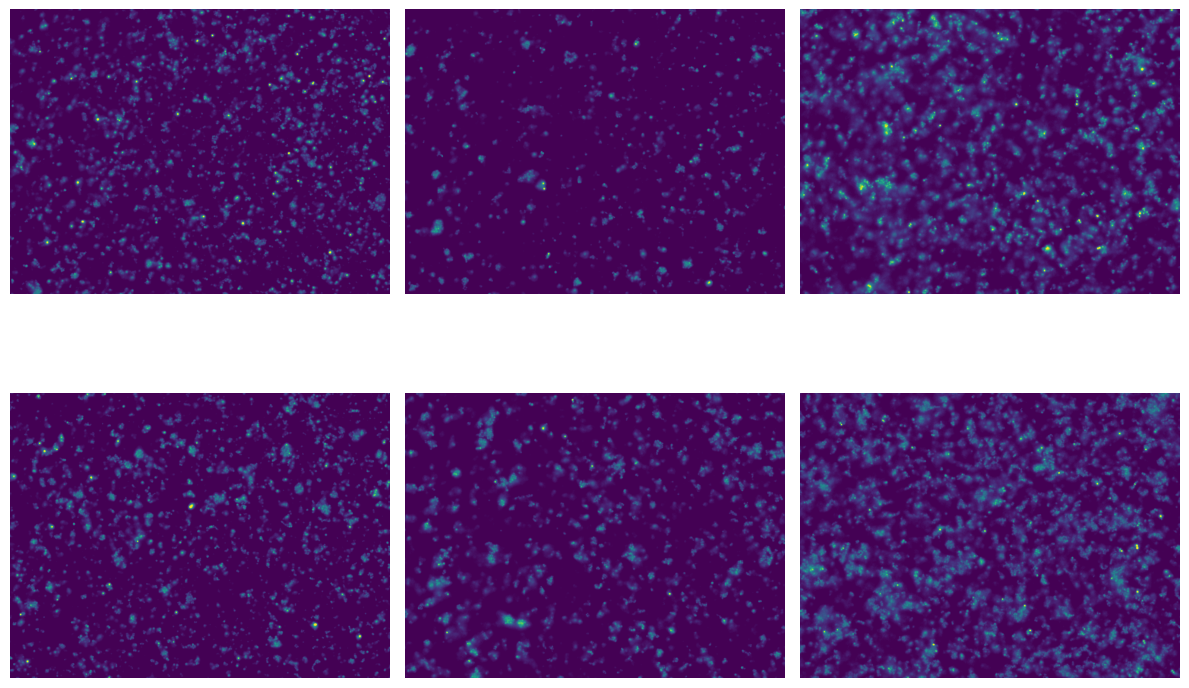

In [138]:
naio4_release_cells_images = [normalize(grayscale(image)) for image in load_images('biofilm_data/release_cells/NaIO4')]

# limit the number of images to 6 for testing
naio4_release_cells_images = naio4_release_cells_images[:6]

print(f"Loaded {len(naio4_release_cells_images)} release cells images from 'biofilm_data/release_cells/NaIO4'")
display_grid_of_images(naio4_release_cells_images)

In [139]:
from sklearn.model_selection import train_test_split

train_untreated, test_untreated = train_test_split(untreated_release_cells_images, test_size=0.2, random_state=42)
train_naio4, test_naio4 = train_test_split(naio4_release_cells_images, test_size=0.2, random_state=42)

print(f"Train untreated: {len(train_untreated)}")
print(f"Test untreated: {len(test_untreated)}")

Train untreated: 4
Test untreated: 2


# Data Augmentation

## Create Square Patches

### Display example of patched image

Example: Original untreated image (normalized grayscale) and its patches:


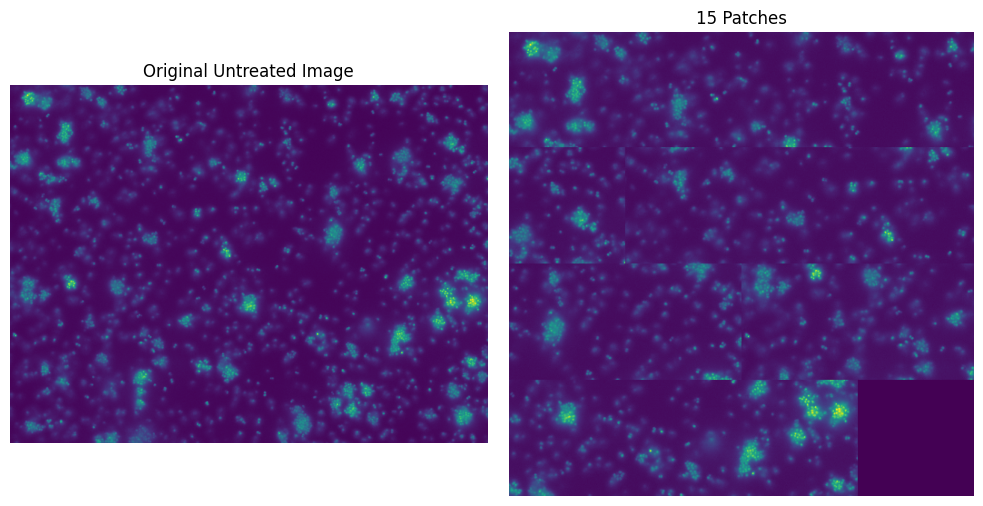

In [140]:
import matplotlib.pyplot as plt

# Show first untreated image before patching and a grid of its patches side by side
print("Example: Original untreated image (normalized grayscale) and its patches:")

patches_from_first_img = extract_patches([untreated_release_cells_images[0]], patch_size)
n_patches = min(16, len(patches_from_first_img))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Show original image
axes[0].imshow(untreated_release_cells_images[0])
axes[0].set_title("Original Untreated Image")
axes[0].axis('off')

# Show patches as grid on the right
grid_size = int(np.ceil(np.sqrt(n_patches)))
for idx in range(n_patches):
    ax = plt.subplot(1, 2, 2)
    # Create small grid for the patches
    patch_grid = np.zeros((patch_size * grid_size, patch_size * grid_size))
    for ix in range(n_patches):
        gx = ix % grid_size
        gy = ix // grid_size
        patch = patches_from_first_img[ix]
        patch_grid[gy*patch_size:(gy+1)*patch_size, gx*patch_size:(gx+1)*patch_size] = patch
    ax.imshow(patch_grid)
    ax.set_title(f"{n_patches} Patches")
    ax.axis('off')
    break  # only need one subplot (right side)

plt.tight_layout()
plt.show()

### Create patches of size 128x128 of all data

In [141]:
patch_size = 128

patched_untreated_images_train = extract_patches(train_untreated, patch_size)
patched_naio4_images_train = extract_patches(train_naio4, patch_size)
patched_untreated_images_test = extract_patches(test_untreated, patch_size)
patched_naio4_images_test = extract_patches(test_naio4, patch_size)

print(f"Length of untreated_release_cells_images: {len(patched_untreated_images_train)}")
print(f"Length of naio4_release_cells_images: {len(patched_naio4_images_train)}")
print(f"Length of patched_untreated_images: {len(patched_untreated_images_train)}")
print(f"Length of patched_naio4_images: {len(patched_naio4_images_train)}")
print(f"Length of patched_untreated_images_test: {len(patched_untreated_images_test)}")
print(f"Length of patched_naio4_images_test: {len(patched_naio4_images_test)}")


Length of untreated_release_cells_images: 60
Length of naio4_release_cells_images: 60
Length of patched_untreated_images: 60
Length of patched_naio4_images: 60
Length of patched_untreated_images_test: 30
Length of patched_naio4_images_test: 30


## Rotate images

### Example Rotation Display

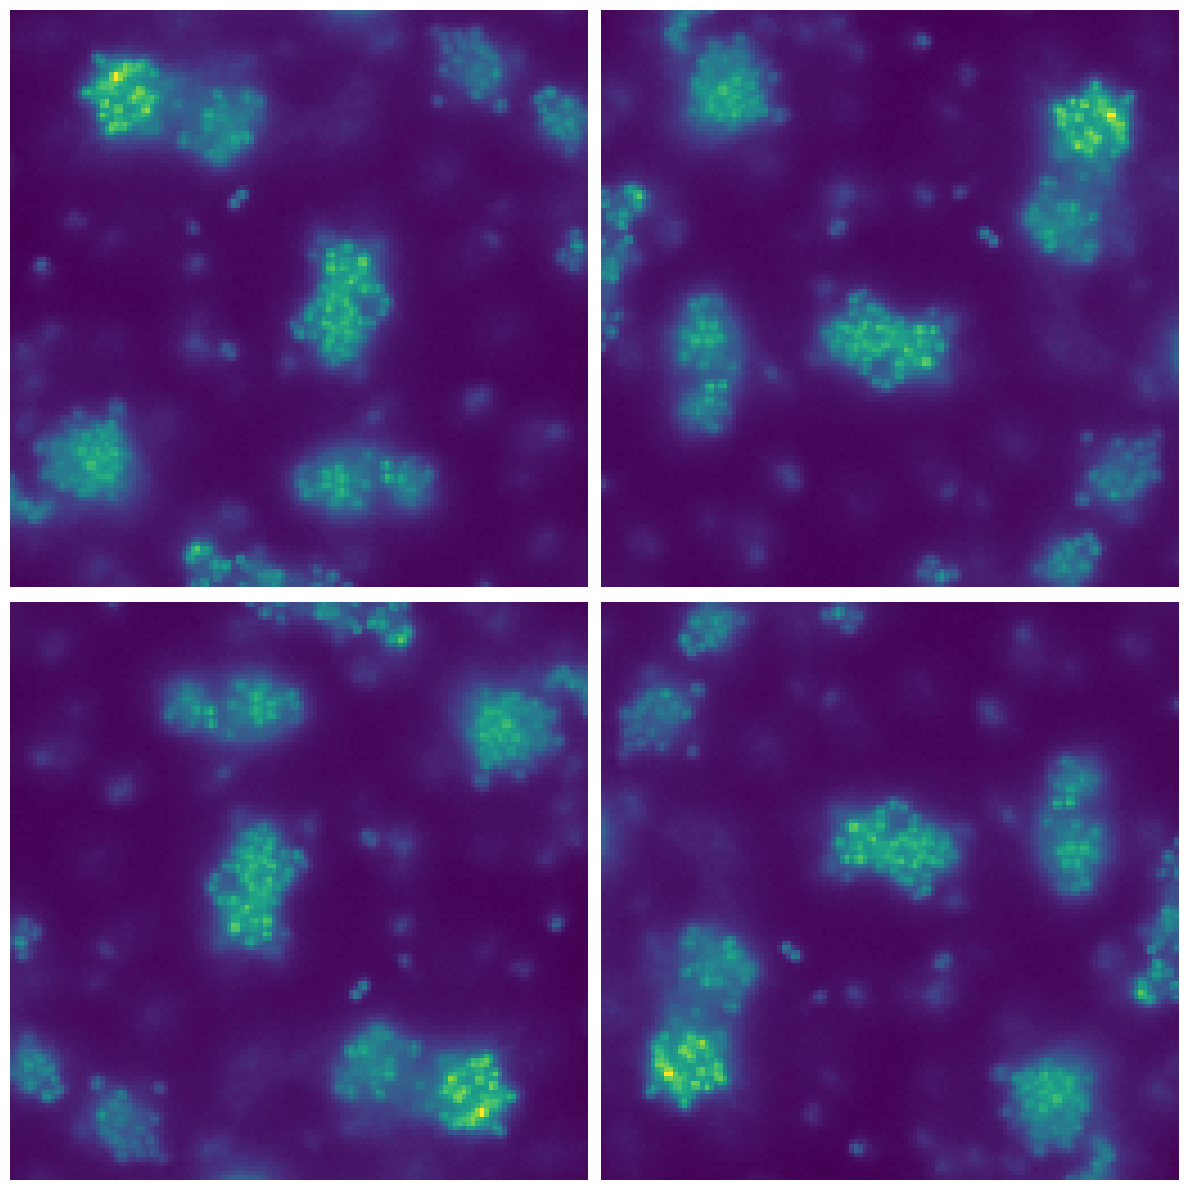

In [142]:
image = patched_untreated_images[0]
display_grid_of_images([image, cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE), cv2.rotate(image, cv2.ROTATE_180), cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)])

### Append Rotated Images to Data

In [143]:
print(f"Total number of patched untreated images: {len(patched_untreated_images_train)}")
print(f"Total number of patched NaIO4 images: {len(patched_naio4_images_train)}")
print(f"Total number of patched untreated images: {len(patched_untreated_images_test)}")
print(f"Total number of patched NaIO4 images: {len(patched_naio4_images_test)}")

for i in range(len(patched_untreated_images_train)):  # len evaluated once
    img = patched_untreated_images_train[i]
    patched_untreated_images_train.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))
    patched_untreated_images_train.append(cv2.rotate(img, cv2.ROTATE_180))
    patched_untreated_images_train.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE))

for i in range(len(patched_naio4_images_train)):  # len evaluated once
    img = patched_naio4_images_train[i]
    patched_naio4_images_train.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))
    patched_naio4_images_train.append(cv2.rotate(img, cv2.ROTATE_180))
    patched_naio4_images_train.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE))

for i in range(len(patched_untreated_images_test)):  # len evaluated once
    img = patched_untreated_images_test[i]
    patched_untreated_images_test.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))
    patched_untreated_images_test.append(cv2.rotate(img, cv2.ROTATE_180))
    patched_untreated_images_test.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE))

for i in range(len(patched_naio4_images_test)):  # len evaluated once
    img = patched_naio4_images_test[i]
    patched_naio4_images_test.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))
    patched_naio4_images_test.append(cv2.rotate(img, cv2.ROTATE_180))
    patched_naio4_images_test.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE))
    


print(f"Total number of patched untreated images after rotation: {len(patched_untreated_images_train)}")
print(f"Total number of patched NaIO4 images after rotation: {len(patched_naio4_images_train)}")
print(f"Total number of patched untreated images after rotation: {len(patched_untreated_images_test)}")
print(f"Total number of patched NaIO4 images after rotation: {len(patched_naio4_images_test)}")


Total number of patched untreated images: 60
Total number of patched NaIO4 images: 60
Total number of patched untreated images: 30
Total number of patched NaIO4 images: 30
Total number of patched untreated images after rotation: 240
Total number of patched NaIO4 images after rotation: 240
Total number of patched untreated images after rotation: 120
Total number of patched NaIO4 images after rotation: 120


### Display total data for each treatment

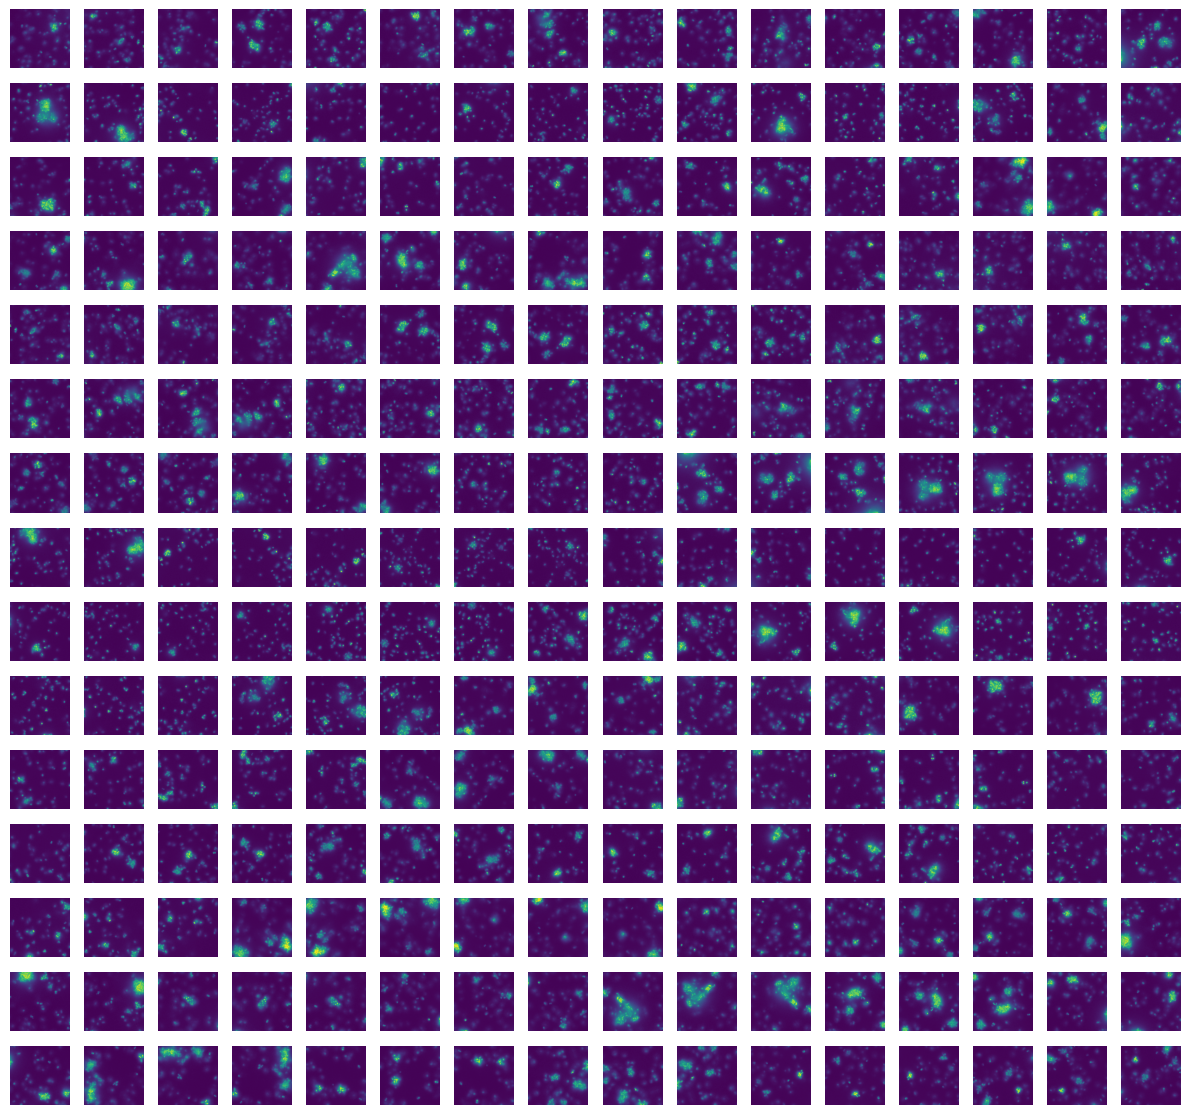

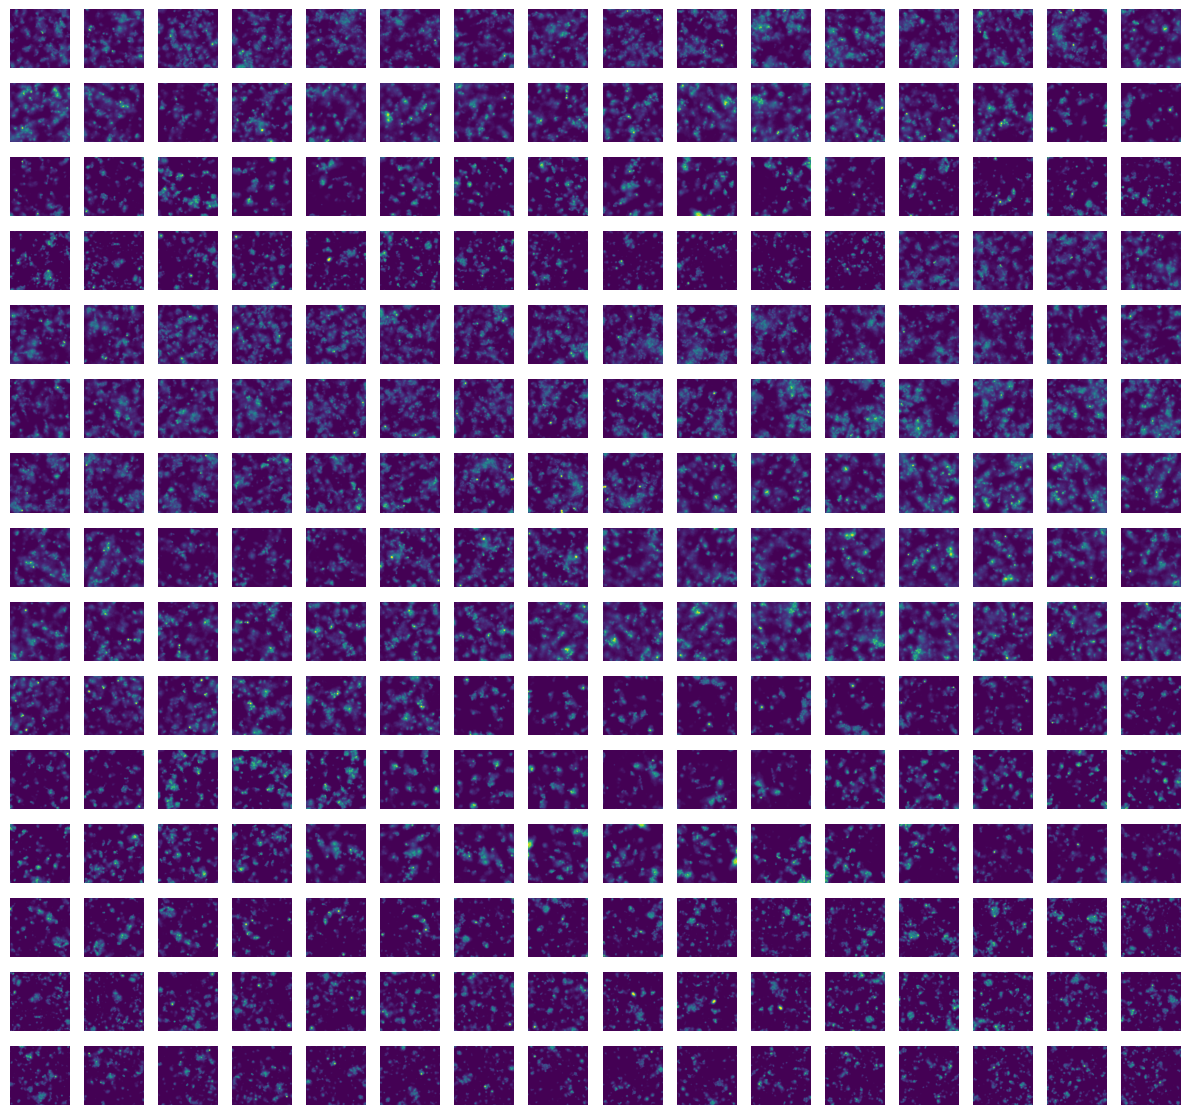

In [144]:
display_grid_of_images(patched_untreated_images_train)
display_grid_of_images(patched_naio4_images_train)

## Prepare Data for CNN

### Add labels to image lists

In [145]:
untreated_patched_labeled_images_train = [(image, "Untreated") for image in patched_untreated_images_train]
naio4_patched_labeled_images_train = [(image, "NaIO4") for image in patched_naio4_images_train]
untreated_patched_labeled_images_test = [(image, "Untreated") for image in patched_untreated_images_test]
naio4_patched_labeled_images_test = [(image, "NaIO4") for image in patched_naio4_images_test]

print(f"Untreated patched labeled images: {len(untreated_patched_labeled_images_train)}")
print(untreated_patched_labeled_images_train[0][0].shape)
print(untreated_patched_labeled_images_train[0][1])
print(f"NaIO4 patched labeled images: {len(naio4_patched_labeled_images_train)}")
print(naio4_patched_labeled_images_train[0][0].shape)
print(naio4__patched_labeled_images[0][1])

Untreated patched labeled images: 240
(128, 128)
Untreated
NaIO4 patched labeled images: 240
(128, 128)
NaIO4


### Create Tensors from pairs

In [146]:
import torch
from torchvision import transforms

# Combine your two lists
data_train = untreated_patched_labeled_images_train + naio4_patched_labeled_images_train
data_test = untreated_patched_labeled_images_test + naio4_patched_labeled_images_test

# Define transform
transform = transforms.ToTensor()  # converts 128x128 (H, W) → (1, 128, 128)

# Prepare tensors
images_train = torch.stack([transform(img) for img, _ in data_train])  # shape: (N, 1, 128, 128)
labels_train = torch.tensor([0 if label == "Untreated" else 1 for _, label in data_train])  # shape: (N,)
images_test = torch.stack([transform(img) for img, _ in data_test])  # shape: (N, 1, 128, 128)
labels_test = torch.tensor([0 if label == "Untreated" else 1 for _, label in data_test])  # shape: (N,)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: torch.Size([300, 1, 128, 128])
Labels shape: torch.Size([300])


In [147]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(images_train.float(), labels_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


# Create, Train, and Evaluate CNN

## Create CNN

In [148]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
   def __init__(self):
       super(CNN, self).__init__()

       self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
       self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
       self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
       self.fc1 = nn.Linear(16 * 32 * 32, 100) # 32 * 32 for 128x128 images that were pooled twice down to 32x32
       self.fc2 = nn.Linear(100, 2)


   def forward(self, x):
       x = F.relu(self.conv1(x))  # Apply first convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = F.relu(self.conv2(x))  # Apply second convolution and ReLU activation
       x = self.pool(x)           # Apply max pooling
       x = x.reshape(x.shape[0], -1)  # Flatten the tensor
       x = self.fc1(x)            # Apply fully connected layer
       x = self.fc2(x)            # Apply fully connected layer
       return x

### Instantiate CNN, Criterion, and Optimizer

In [149]:
import torch.nn as nn
import torch.optim as optim

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Training Loop

In [150]:
num_epochs = 15

for epoch in range(num_epochs):
    for X, y in dataloader:
        optimizer.zero_grad()      # reset gradients
        outputs = model(X)         # forward pass
        loss = criterion(outputs, y)  # compute loss
        loss.backward()            # backpropagate
        optimizer.step()           # update weights

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/15], Loss: 0.8567
Epoch [2/15], Loss: 0.6132
Epoch [3/15], Loss: 0.5178
Epoch [4/15], Loss: 0.3846
Epoch [5/15], Loss: 0.1955
Epoch [6/15], Loss: 0.0790
Epoch [7/15], Loss: 0.0287
Epoch [8/15], Loss: 0.0200
Epoch [9/15], Loss: 0.0106
Epoch [10/15], Loss: 0.0065
Epoch [11/15], Loss: 0.0033
Epoch [12/15], Loss: 0.0037
Epoch [13/15], Loss: 0.0015
Epoch [14/15], Loss: 0.0017
Epoch [15/15], Loss: 0.0017


### Evaluation

In [152]:
with torch.no_grad():
    # Evaluate training accuracy
    train_preds = model(images.float()).argmax(dim=1)
    train_acc = (train_preds == labels).float().mean()
    print(f"Training accuracy: {train_acc:.4f}")

    # Evaluate test accuracy (and error)
    test_preds = model(images_test.float()).argmax(dim=1)
    test_acc = (test_preds == labels_test).float().mean()
    test_error = 1 - test_acc
    print(f"Test accuracy: {test_acc:.4f}")
    print(f"Test error: {test_error:.4f}")


Training accuracy: 0.9667
Test accuracy: 0.8333
Test error: 0.1667
